In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd() 
# 현재경로 얻기

'C:\\Users\\pmcsh\\Downloads\\Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch\\실습 코드'

In [3]:
os.listdir('../dataset/mnist_png/training/0/') 
# os.listdir() 중요

['1.png',
 '1000.png',
 '10005.png',
 '10010.png',
 '10022.png',
 '10025.png',
 '10026.png',
 '10045.png',
 '10069.png',
 '10071.png',
 '10080.png',
 '10083.png',
 '10107.png',
 '10119.png',
 '10120.png',
 '10121.png',
 '10128.png',
 '10140.png',
 '1015.png',
 '10167.png',
 '10168.png',
 '10176.png',
 '1018.png',
 '10188.png',
 '10195.png',
 '10203.png',
 '10204.png',
 '10221.png',
 '10230.png',
 '10237.png',
 '10240.png',
 '10242.png',
 '10245.png',
 '10254.png',
 '10259.png',
 '10261.png',
 '10265.png',
 '10272.png',
 '10276.png',
 '1028.png',
 '10283.png',
 '1029.png',
 '10323.png',
 '10326.png',
 '10334.png',
 '10340.png',
 '10343.png',
 '10348.png',
 '10352.png',
 '10363.png',
 '10366.png',
 '10372.png',
 '10380.png',
 '10384.png',
 '1040.png',
 '10407.png',
 '10425.png',
 '10439.png',
 '10456.png',
 '1046.png',
 '10469.png',
 '10471.png',
 '10479.png',
 '10488.png',
 '1049.png',
 '10505.png',
 '10523.png',
 '10530.png',
 '10531.png',
 '10542.png',
 '10563.png',
 '10564.png',
 '10

In [4]:
data_paths = glob('../dataset/mnist_png/training/*/*.png')
# glob() 유용
# png가 포함된 파일만 가져온다.

In [5]:
data_paths[-1]

'../dataset/mnist_png/training\\9\\9998.png'

In [6]:
len(data_paths)

60000

In [7]:
path = data_paths[0]

In [8]:
path

'../dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [9]:
os.listdir('../dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
len(os.listdir('../dataset/mnist_png/training/'))

10

In [11]:
label_nums = os.listdir('../dataset/mnist_png/training/')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [12]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [13]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('../dataset/mnist_png/training/'+ lbl_n)
    nums_dataset.append(len(data_per_class))

In [14]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

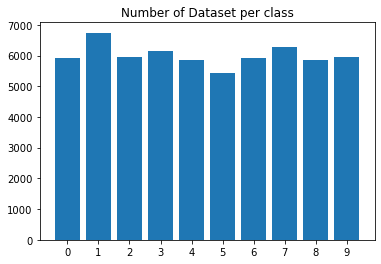

In [16]:
plt.bar(label_nums, nums_dataset)
plt.title("Number of Dataset per class")
plt.show()

# Pillow로 열기

In [17]:
path

'../dataset/mnist_png/training\\0\\1.png'

In [18]:
image_pil =  Image.open(path)
image = np.array(image_pil)

In [19]:
image.shape

(28, 28)

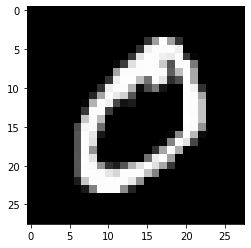

In [20]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [21]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [22]:
image.shape

TensorShape([28, 28, 1])

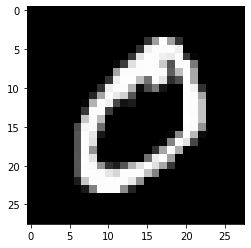

In [23]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

# Label 얻기

In [24]:
path

'../dataset/mnist_png/training\\0\\1.png'

In [25]:
label = path.split('\\')[-2]

In [26]:
label

'0'

In [27]:
int(label)

0

In [28]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [29]:
path, get_label(path)

('../dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [30]:
from tqdm import tqdm_notebook
# 유용한 라이브러리

In [31]:
heights = []
widths = []

In [32]:
len(data_paths)

60000

In [33]:
image.shape

TensorShape([28, 28, 1])

In [34]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(28, 28)

In [35]:
h, w = image.shape

In [36]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

C:\Users\pmcsh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/60000 [00:00<?, ?it/s]

In [37]:
np.unique(heights)

array([28])

In [38]:
np.unique(widths)

array([28])

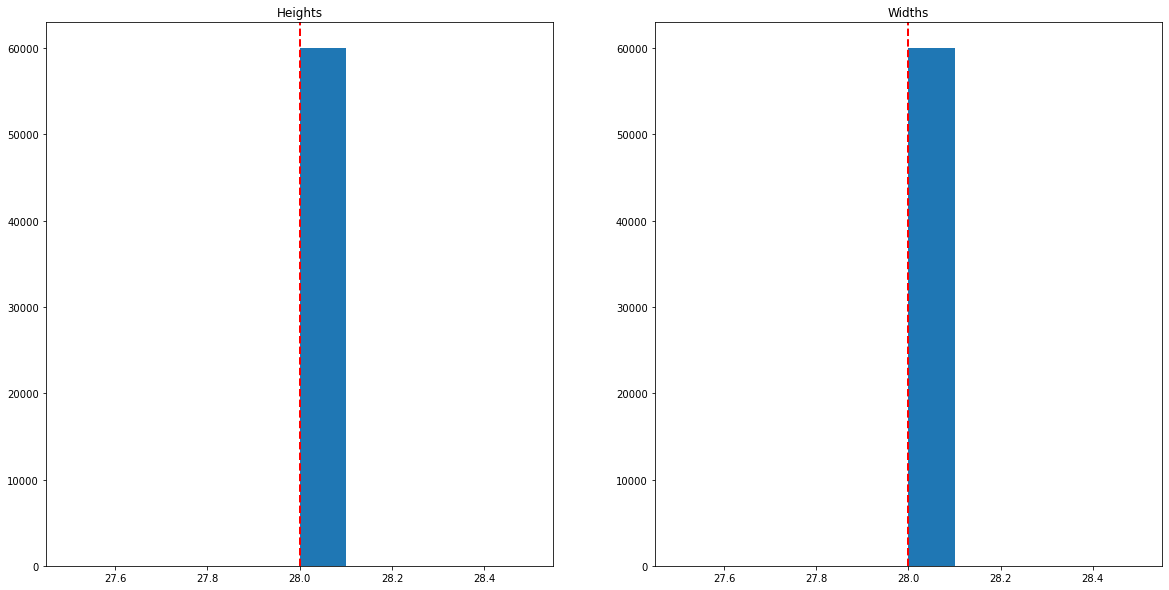

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()